In [1]:
from collections import Counter
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np

# batch size
BATCH_SIZE = 64

In [2]:
train_dir = "../data/files/fer/train"
test_dir = "../data/files/fer/test"

In [3]:
train_transforms = transforms.Compose([transforms.ToTensor(), transforms.ToPILImage()])

In [4]:
train_dataset = ImageFolder(train_dir, transform=train_transforms)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = ImageFolder(test_dir, transform=train_transforms)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
# Get class names (emotions)
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

Number of classes: 7
Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Total train samples: 28709
Total test samples: 7178
angry: train=3995 (13.9%), test=958 (13.3%)
disgust: train=436 (1.5%), test=111 (1.5%)
fear: train=4097 (14.3%), test=1024 (14.3%)
happy: train=7215 (25.1%), test=1774 (24.7%)
neutral: train=4965 (17.3%), test=1233 (17.2%)
sad: train=4830 (16.8%), test=1247 (17.4%)
surprise: train=3171 (11.0%), test=831 (11.6%)


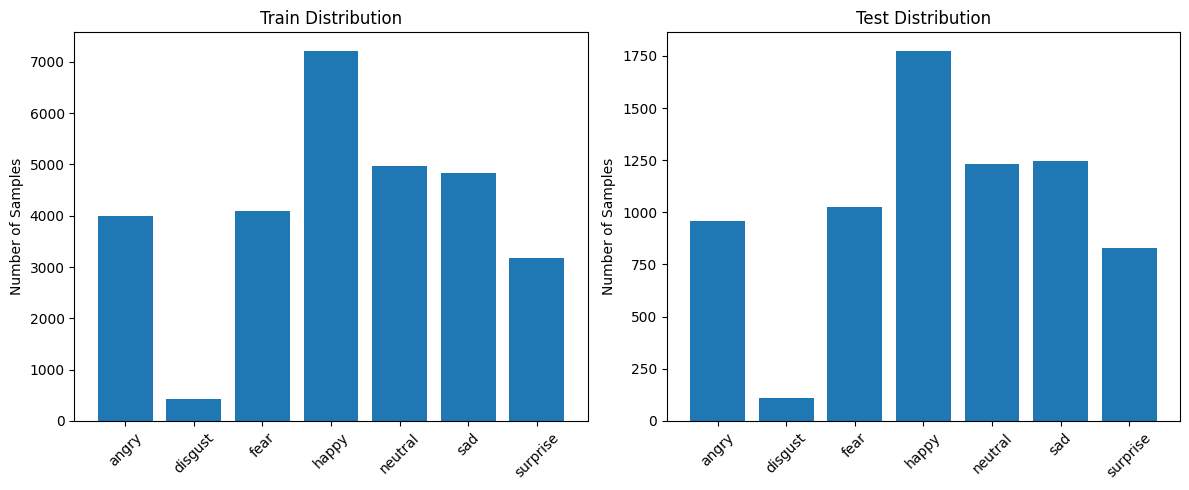

In [6]:
# Count samples per class (use dataset targets for efficiency)
train_targets = np.array(train_dataset.targets)
train_counts = Counter(train_targets)
train_dist = {class_names[i]: count for i, count in train_counts.items()}

test_targets = np.array(test_dataset.targets)
test_counts = Counter(test_targets)
test_dist = {class_names[i]: count for i, count in test_counts.items()}

total_train = len(train_dataset)
total_test = len(test_dataset)

print(f"Total train samples: {total_train}")
print(f"Total test samples: {total_test}")

# Print distributions with percentages
for cls in class_names:
    train_pct = (train_dist.get(cls, 0) / total_train * 100) if total_train > 0 else 0
    test_pct = (test_dist.get(cls, 0) / total_test * 100) if total_test > 0 else 0
    print(
        f"{cls}: train={train_dist.get(cls, 0)} ({train_pct:.1f}%), test={test_dist.get(cls, 0)} ({test_pct:.1f}%)"
    )

# Plot distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(train_dist.keys(), train_dist.values())
ax1.set_title("Train Distribution")
ax1.tick_params(axis="x", rotation=45)
ax1.set_ylabel("Number of Samples")

ax2.bar(test_dist.keys(), test_dist.values())
ax2.set_title("Test Distribution")
ax2.tick_params(axis="x", rotation=45)
ax2.set_ylabel("Number of Samples")

plt.tight_layout()
plt.show()

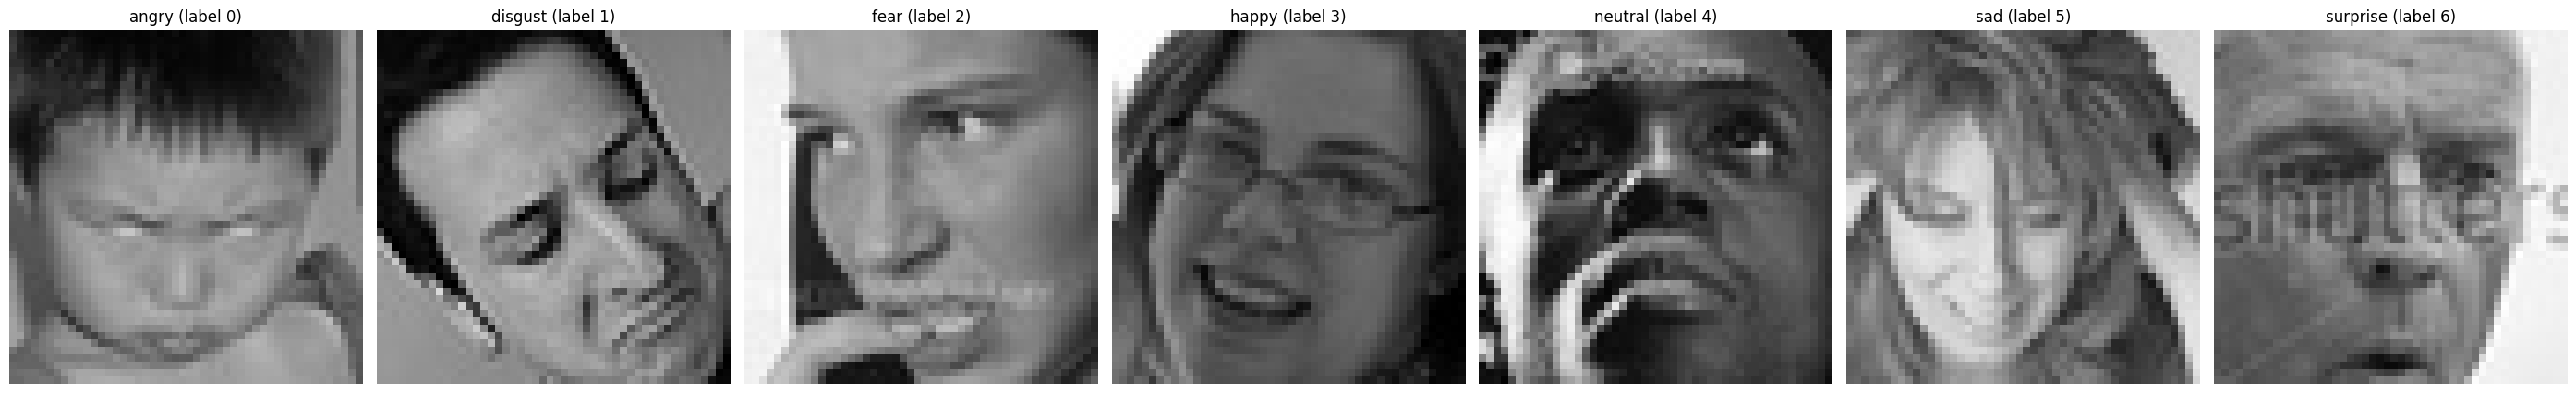

In [7]:
# Display sample images (2 rows, one per class)
fig, axes = plt.subplots(1, len(class_names), figsize=(4 * len(class_names), 8))
axes = axes.ravel() if num_classes > 1 else axes

for idx, cls in enumerate(class_names):
    # Find first index for this class
    cls_indices = np.where(train_targets == idx)[0]
    if len(cls_indices) > 0:
        sample_idx = cls_indices[0]
        sample_img, sample_label = train_dataset[sample_idx]
        axes[idx].imshow(sample_img, cmap="gray")  # Grayscale typical for FER2013
        axes[idx].set_title(f"{cls} (label {sample_label})")
        axes[idx].axis("off")
    else:
        axes[idx].text(0.5, 0.5, "No samples", ha="center", va="center")
        axes[idx].axis("off")

plt.tight_layout()
plt.show()

In [8]:
# Sample 100 images per class for stats (avoid full dataset for speed)
sample_size = 100
stats = {"mean": [], "std": [], "sizes": []}

for idx, cls in enumerate(class_names):
    cls_indices = np.where(train_targets == idx)[0][:sample_size]
    class_means, class_stds, class_sizes = [], [], []

    for s_idx in cls_indices:
        img, _ = train_dataset[s_idx]
        img_array = np.array(img)  # PIL to array
        if len(img_array.shape) == 3:  # If RGB, convert to gray
            img_array = np.mean(img_array, axis=2)
        class_means.append(np.mean(img_array))
        class_stds.append(np.std(img_array))
        class_sizes.append(img_array.shape)

    stats["mean"].append(np.mean(class_means))
    stats["std"].append(np.mean(class_stds))
    stats["sizes"].append(class_sizes[0] if class_sizes else (48, 48))  # Assume uniform

print("Per-class stats (mean intensity, std, size):")
for i, cls in enumerate(class_names):
    print(
        f"{cls}: mean={stats['mean'][i]:.2f}, std={stats['std'][i]:.2f}, size={stats['sizes'][i]}"
    )

# Overall dataset stats
all_indices = np.random.choice(
    len(train_dataset), min(1000, len(train_dataset)), replace=False
)
overall_means, overall_stds = [], []
for idx in all_indices:
    img, _ = train_dataset[idx]
    img_array = np.array(img)
    if len(img_array.shape) == 3:
        img_array = np.mean(img_array, axis=2)
    overall_means.append(np.mean(img_array))
    overall_stds.append(np.std(img_array))

print(f"\nOverall: mean={np.mean(overall_means):.2f}, std={np.mean(overall_stds):.2f}")

Per-class stats (mean intensity, std, size):
angry: mean=127.45, std=52.01, size=(48, 48)
disgust: mean=135.59, std=52.21, size=(48, 48)
fear: mean=136.54, std=53.86, size=(48, 48)
happy: mean=124.31, std=52.33, size=(48, 48)
neutral: mean=120.59, std=54.59, size=(48, 48)
sad: mean=115.35, std=51.47, size=(48, 48)
surprise: mean=150.19, std=51.69, size=(48, 48)

Overall: mean=129.15, std=53.58
